In [12]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(100, 1) (100, 1)


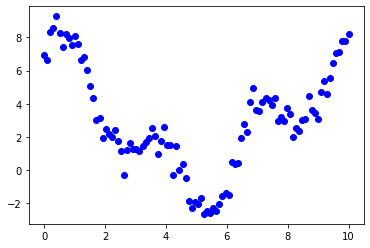

In [224]:
Xtr = np.linspace(0,10,100)
Xtr = Xtr.reshape((100,1))
Ytr = np.sin(Xtr) + 2* np.sin(2 * Xtr) + 0.3 * (Xtr - 5)**2 + np.random.normal(0, 0.5, [100,1])
print(Ytr.shape, Xtr.shape)

plt.plot(Xtr, Ytr, 'bo')
plt.show()

In [225]:
# Parameters
learning_rate = 0.01
num_epochs = 2000
# batch_size = 10
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 1 # MNIST data input (img shape: 28*28)
num_output = 1 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_output])

In [226]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_output]))
}

In [227]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer 
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [228]:
# Construct model
fp = neural_net(X)

# Define loss and optimizer
cost = tf.reduce_sum(tf.pow(fp-Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [229]:
sess = tf.Session()
sess.run(init)

In [230]:
for epoch in range(num_epochs):

    # Run optimization op (backprop)
    sess.run(train_op, feed_dict={X: Xtr, Y: Ytr})
    if (epoch+1) % display_step == 0 or epoch == 0:
#         # Calculate batch loss and accuracy
        loss = sess.run(cost, feed_dict={X: Xtr, Y: Ytr})
        print("Epoch " + str(epoch+1) + ", Loss= " + \
              "{:.4f}".format(loss))        
        

print("Optimization Finished!")



Epoch 1, Loss= 3477.7051
Epoch 100, Loss= 157.9945
Epoch 200, Loss= 90.3294
Epoch 300, Loss= 65.9366
Epoch 400, Loss= 57.7670
Epoch 500, Loss= 49.8756
Epoch 600, Loss= 44.3156
Epoch 700, Loss= 39.6570
Epoch 800, Loss= 34.8946
Epoch 900, Loss= 30.2432
Epoch 1000, Loss= 26.9760
Epoch 1100, Loss= 25.2126
Epoch 1200, Loss= 24.2953
Epoch 1300, Loss= 23.7930
Epoch 1400, Loss= 23.4831
Epoch 1500, Loss= 23.3111
Epoch 1600, Loss= 23.0683
Epoch 1700, Loss= 22.9114
Epoch 1800, Loss= 22.7478
Epoch 1900, Loss= 22.6065
Epoch 2000, Loss= 22.4671
Optimization Finished!


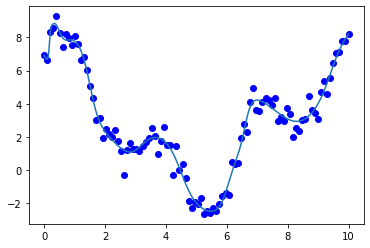

In [231]:
Xtest = np.linspace(0,10,1000)
Xtest = Xtest.reshape((1000,1))
Ytest = sess.run(fp, feed_dict = {X:Xtest})

plt.plot(Xtr, Ytr, 'bo')
plt.plot(Xtest, Ytest)
plt.show()

In [45]:
z = np.array([[0],[1]])
z.shape

(2, 1)